In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


StatementMeta(spark81f7pnl, 8, 2, Finished, Available)

In [4]:
data = pd.read_csv("abfss://files@datalake81f7pnl.dfs.core.windows.net/data/part-00000-tid-6519786070209236597-536765b3-1c91-42f4-853a-fb45cf45fc31-38-1-c000.csv")
data

StatementMeta(spark81f7pnl, 8, 3, Finished, Available)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,isProfit
0,Second Class,Consumer,Westland,Michigan,48185,Central,Office Supplies,Storage,211.960,4,0.0,8.4784,P
1,Second Class,Corporate,Vancouver,Washington,98661,West,Furniture,Furnishings,14.800,4,0.0,6.0680,P
2,Standard Class,Consumer,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,11.540,2,0.0,5.7700,P
3,Standard Class,Corporate,Detroit,Michigan,48234,Central,Office Supplies,Binders,41.540,2,0.0,19.5238,P
4,Second Class,Consumer,Springfield,Missouri,65807,Central,Office Supplies,Storage,286.290,3,0.0,17.1774,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,Standard Class,Consumer,Detroit,Michigan,48227,Central,Office Supplies,Binders,14.670,3,0.0,6.7482,P
9973,Standard Class,Consumer,Louisville,Colorado,80027,West,Office Supplies,Paper,6.672,1,0.2,2.0850,P
9974,Standard Class,Corporate,Richmond,Kentucky,40475,South,Office Supplies,Binders,115.360,7,0.0,56.5264,P
9975,Standard Class,Home Office,Los Angeles,California,90032,West,Office Supplies,Art,18.690,7,0.0,5.2332,P


In [5]:
data.columns


StatementMeta(spark81f7pnl, 8, 4, Finished, Available)

Index(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'isProfit'],
      dtype='object')

StatementMeta(spark81f7pnl, 8, 5, Finished, Available)

<AxesSubplot: >

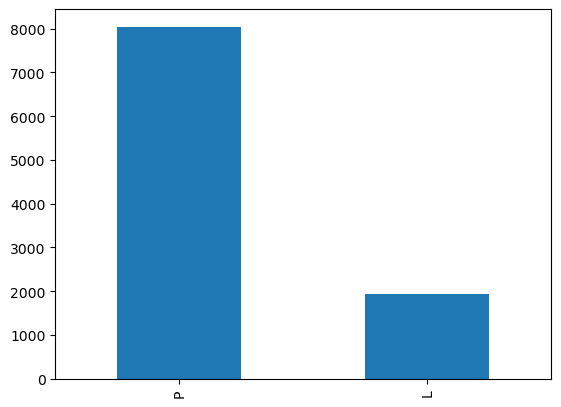

In [6]:
data['isProfit'].value_counts().plot.bar()

StatementMeta(spark81f7pnl, 8, 6, Finished, Available)

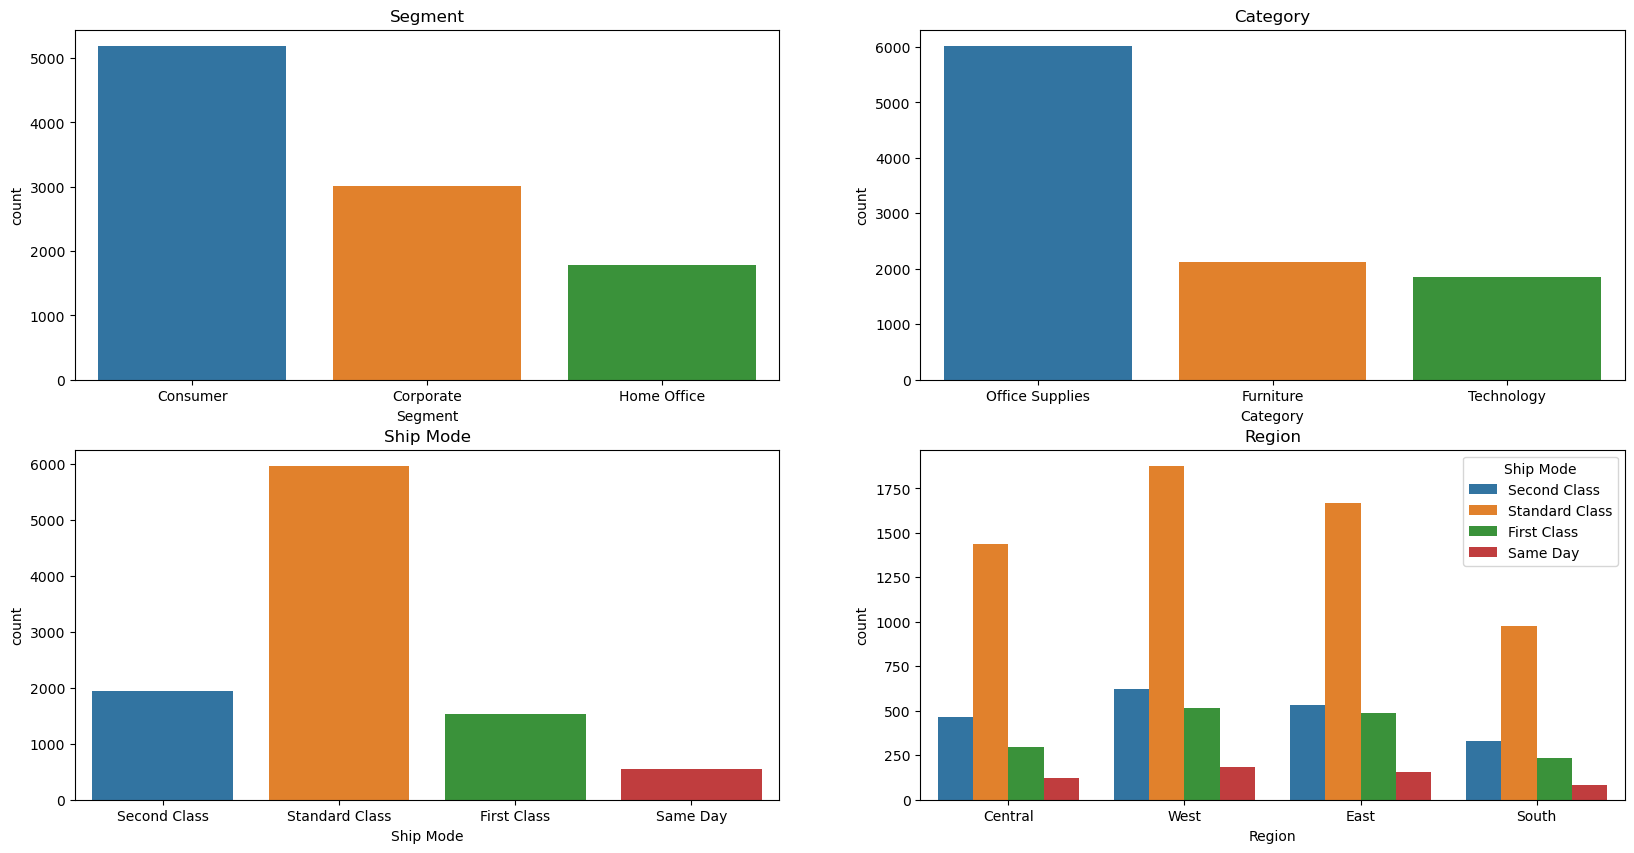

In [7]:
plt.figure(figsize=(20,10))

plt.subplot(221)
# store['Segment'].value_counts().plot.bar(figsize=(20,10), title= 'Segment')
sns.countplot(x='Segment', data=data).set(title='Segment');

plt.subplot(222)
# store['Category'].value_counts().plot.bar(figsize=(20,10), title= 'Category')
sns.countplot(x='Category', data=data).set(title='Category');

plt.subplot(223)
sns.countplot(x='Ship Mode', data=data).set(title='Ship Mode');

plt.subplot(224)
sns.countplot(x='Region', data=data,  hue= data['Ship Mode']).set(title='Region');

StatementMeta(spark81f7pnl, 8, 7, Finished, Available)

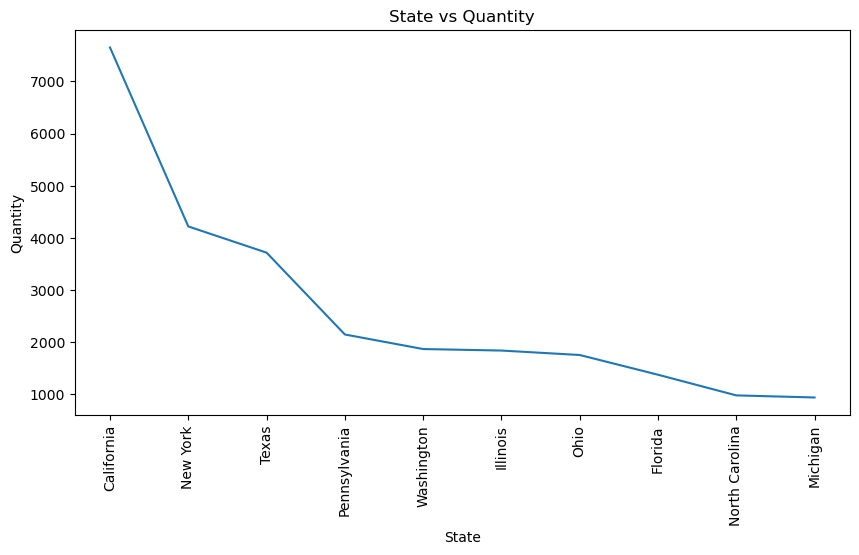

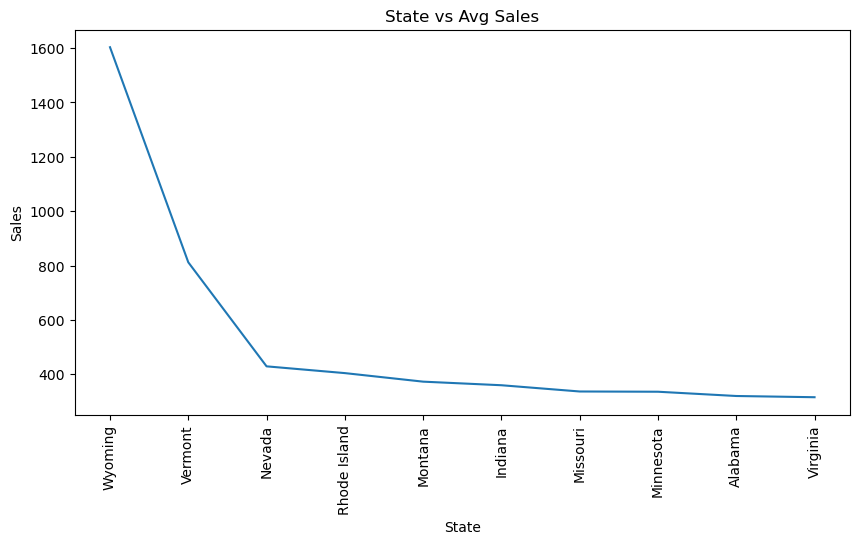

In [8]:
grouping=data.groupby('State').agg({'Quantity':'sum','Sales':'mean','Discount':'mean','Profit':'mean'})

top_Quantity = grouping.nlargest(10,'Quantity')
plt.figure(figsize=(10,5))
plt.title('State vs Quantity')
sns.lineplot(x='State', y='Quantity', data=top_Quantity.reset_index())
plt.xticks(rotation=90);

avg_sale = grouping.nlargest(10,'Sales')
plt.figure(figsize=(10,5))
plt.title('State vs Avg Sales')
sns.lineplot(x='State', y='Sales',markers='O',ms=5, data=avg_sale.reset_index())
plt.xticks(rotation=90);


StatementMeta(spark81f7pnl, 8, 8, Finished, Available)

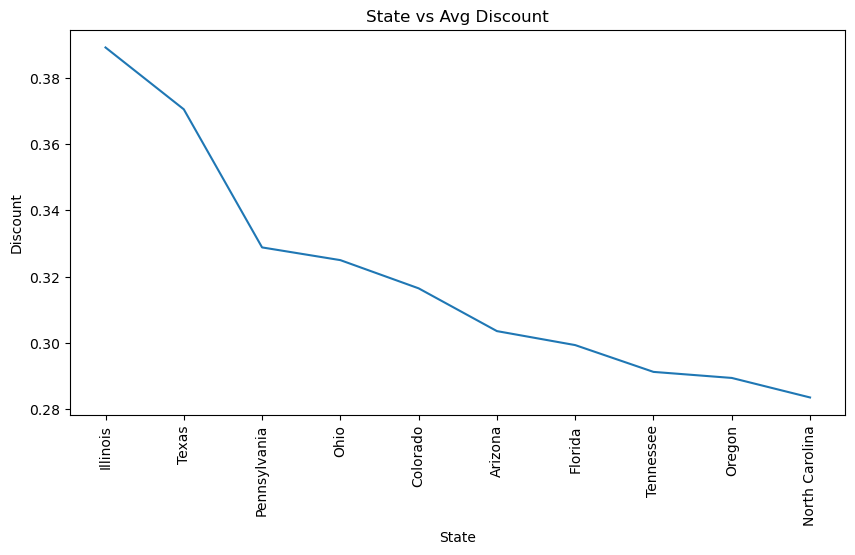

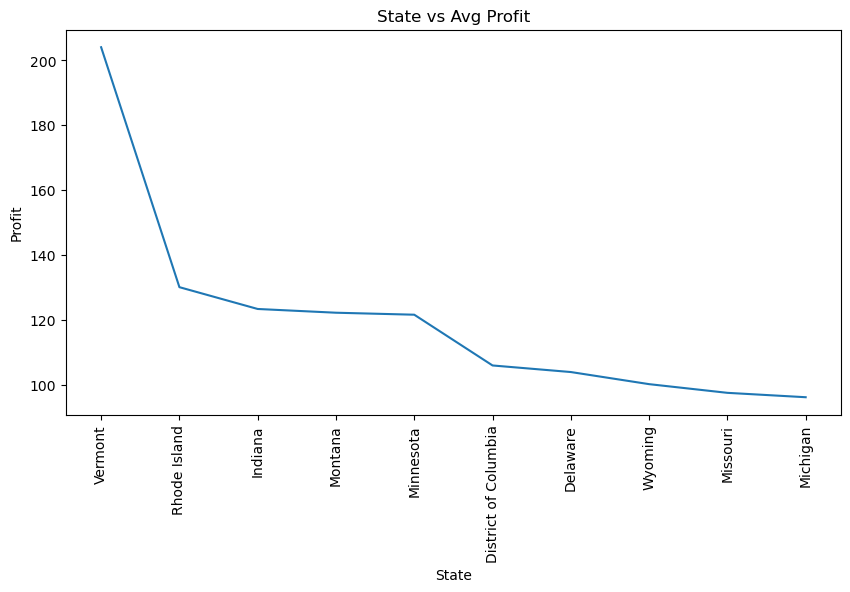

In [9]:
avg_discount = grouping.nlargest(10,'Discount') 
plt.figure(figsize=(10,5))
plt.title('State vs Avg Discount')
sns.lineplot(x='State',y='Discount', data=avg_discount.reset_index());
plt.xticks(rotation=90);

avg_profit = grouping.nlargest(10,'Profit') 
plt.figure(figsize=(10,5))
plt.title('State vs Avg Profit')
sns.lineplot(x='State',y='Profit', data=avg_profit.reset_index());
plt.xticks(rotation=90);

StatementMeta(spark81f7pnl, 8, 9, Finished, Available)

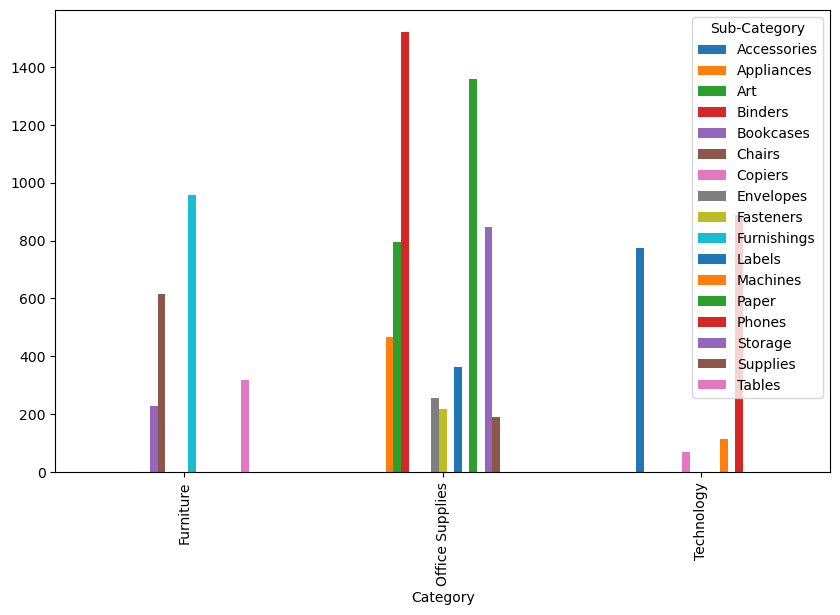

In [10]:
pd.crosstab(data['Category'], data['Sub-Category']).plot(kind='bar', legend=True, figsize=(10, 6))
plt.show()

In [11]:
df = pd.DataFrame(data.groupby(['Category','Sub-Category']).count().iloc[:,0]).reset_index()
pivot = pd.pivot_table(data=data, index=['Category'], columns=['Sub-Category'], values='Ship Mode')

# pivot = pd.pivot_table(data=df, index=['Category'], columns=['Sub-Category'], values='Ship Mode')
# pivot.plot()

StatementMeta(spark81f7pnl, 8, 10, Finished, Available)

/tmp/ipykernel_7893/3463176574.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pivot = pd.pivot_table(data=data, index=['Category'], columns=['Sub-Category'], values='Ship Mode')


StatementMeta(spark81f7pnl, 8, 11, Finished, Available)

<AxesSubplot: xlabel='Ship Mode'>

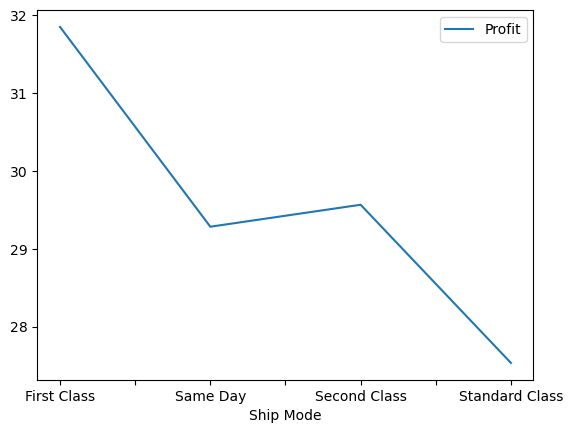

In [12]:
data.groupby('Ship Mode').agg({'Profit':'mean'}).plot(kind='line')


StatementMeta(spark81f7pnl, 8, 12, Finished, Available)

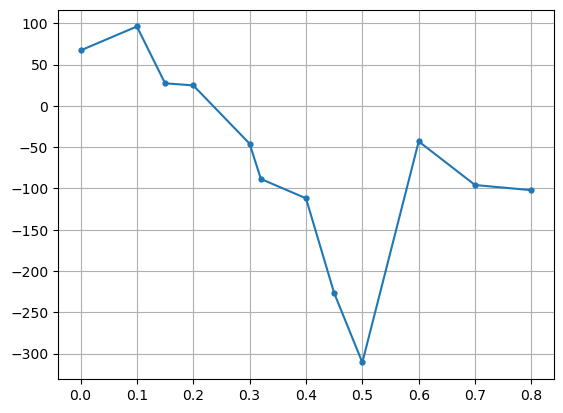

In [13]:
# store.groupby('Discount').agg({'Profit':'mean'}).plot(kind='line')
plt.plot(data.groupby('Discount').agg({'Profit':'mean'}),marker='o',ms=3.5)
plt.grid()

StatementMeta(spark81f7pnl, 8, 13, Finished, Available)

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

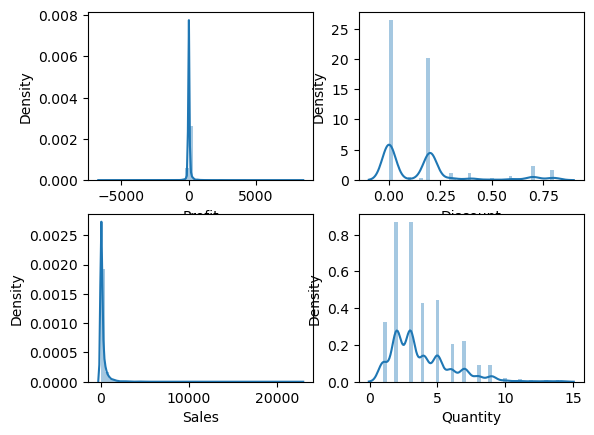

In [14]:
plt.subplot(221)
sns.distplot(data['Profit']);

plt.subplot(222)
sns.distplot(data['Discount']);

plt.subplot(223)
sns.distplot(data['Sales']);

plt.subplot(224)
sns.distplot(data['Quantity']);